In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [4]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [5]:
# Could also do this for a Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)

In [6]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [7]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [8]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [9]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  37.157749  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  36.763119  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  36.810474  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  36.755238  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  36.778908  15619400   

Bank Ticker           C                                        ...     \
Stock Info         Open        High         Low       Close    ...      
Date                                                           ...      
2006-01-03   490.000000  493.799988  481.100006  492.899994    ...      
2006-01-04   488.600006  491.000000  483.500000  483.799988    ...      
2006-01-05   484.399994  487.799988  484.000000  486.200012    ...      
2006-01-06   488.799988  489.000000  482.000000  486.200012    ...      
2006-01-09   486.000000  487.399994  483.000000  483.899994    ...      

Bank Ticker         MS                                       WFC             \
Stock Info         Low      Close  Adj Close   Volume       Open       High   
Date                                                                          
2006-01-03   56.740002  58.310001  40.259113  5377000  31.600000  31.975000   
2006-01-04   58.349998  58.349998  40.286736  7977800  31.799999  31.820000   
2006-01-05   58.020000  58.509998  40.397205  5778000  31.500000  31.555000   
2006-01-06   58.049999  58.570000  40.438644  6889800  31.580000  31.775000   
2006-01-09   58.619999  59.189999  40.866695  4144500  31.674999  31.825001   

Bank Ticker                                             
Stock Info         Low      Close  Adj Close    Volume  
Date                                                    
2006-01-03   31.195000  31.900000  23.238424  11016400  
2006-01-04   31.365000  31.530001  22.968884  10870000  
2006-01-05   31.309999  31.495001  22.943392  10158000  
2006-01-06   31.385000  31.680000  23.078157   8403800  
2006-01-09   31.555000  31.674999  23.074520   5619600  

[5 rows x 36 columns]

In [8]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [10]:
returns = pd.DataFrame()

In [11]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** Crie um parplot utilizando seaborn no dataframe de retorno. **

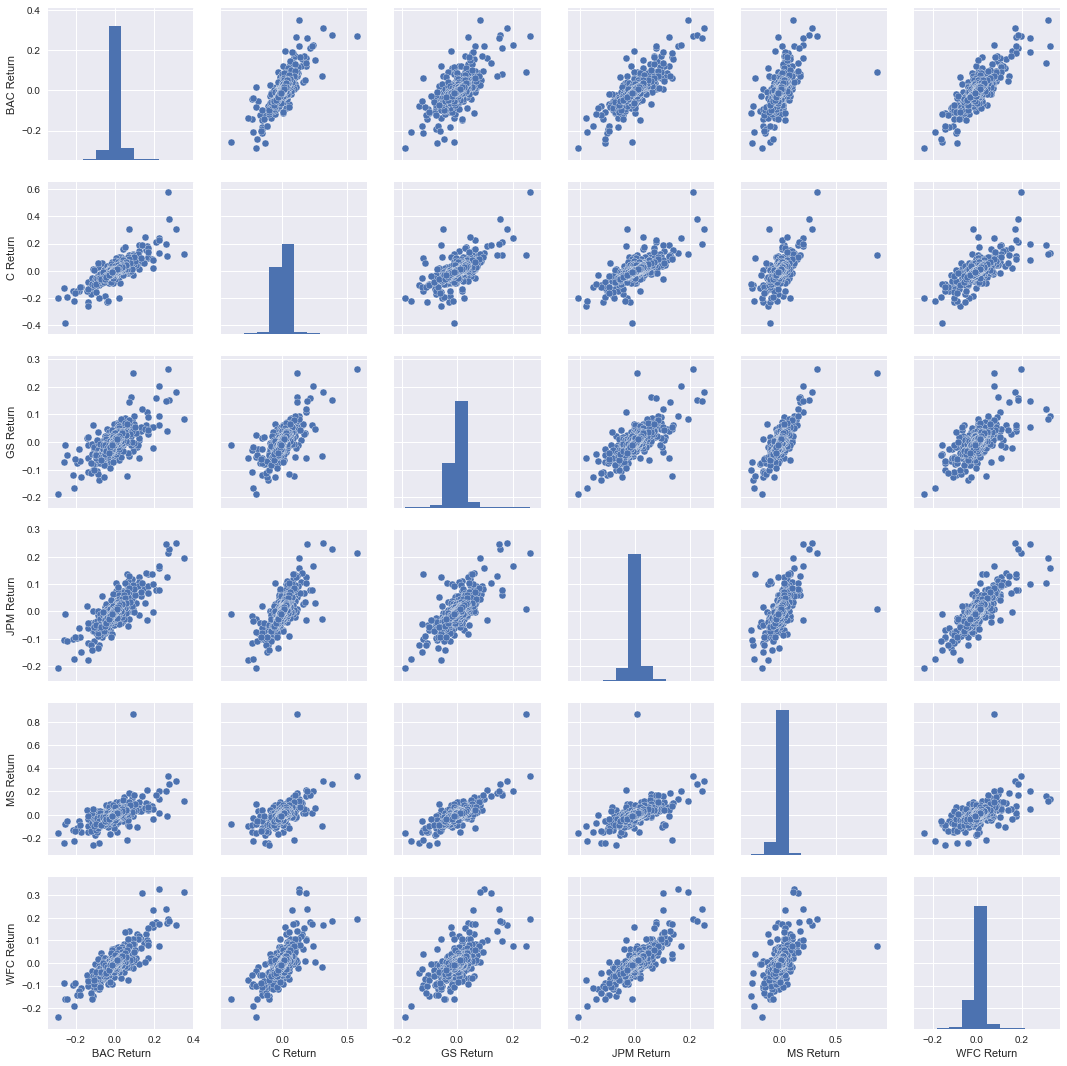

In [12]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

In [13]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [14]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [15]:
returns.std() # Citigroup é a mais arriscada

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [16]:
returns.ix['2015-01-01':'2015-12-31'].std() # Muito similares, mas podemos escolher Morgan Stanley ou BofA

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

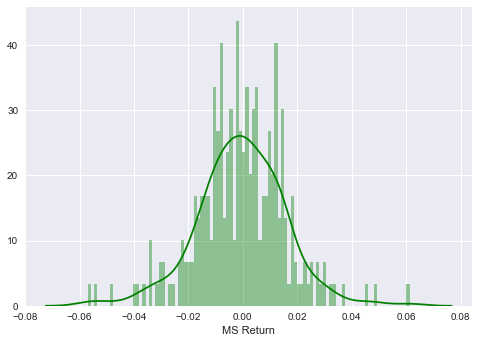

In [17]:
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

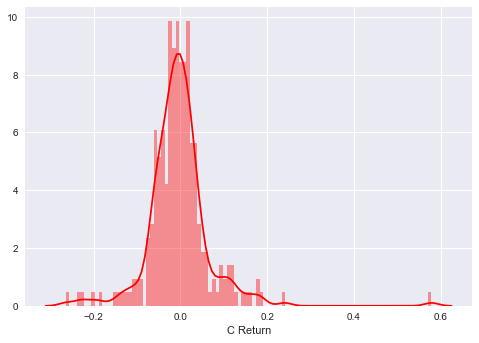

In [18]:
sns.distplot(returns.ix['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)